In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

data = open('Mod10_2.txt').read()

corpus = data.lower().split("\n")

print(corpus)


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')


In [ ]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding="pre")

xs, labels = input_sequences[:, :-1], input_sequences[:, -1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)


In [12]:
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

token_list = []
for word in sentence:
    if word in tokenizer.word_index:
        token_list.append(tokenizer.word_index[word])
    else:
        token_list.append(0)  # Use 0 as the token for out-of-vocabulary words

print(token_list)


sample sentence: ['machine', 'learning', '(ml)', 'is', 'a', 'category', 'of', 'an', 'algorithm', 'that', 'allows', 'software', 'applications', 'to', 'become']
[19, 9, 0, 4, 2, 61, 3, 11, 32, 5, 62, 33, 63, 6, 64]


In [14]:
element_number = 5
print(f'token list: {xs[element_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[element_number]])}')


token list: [ 0  0  0  0  0  0  0  0  0  0  0  0 19  9 60  4  2 61]
decoded to text: ['machine learning ml is a category']


In [16]:
embedding_dim = 100
lstm_units = 150
learning_rate = 0.01

model = Sequential([
    Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
    Bidirectional(LSTM(lstm_units)),
    Dense(total_words, activation='softmax')
])

# use LSTM  instead 
# model = Sequential([
#     Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
#     LSTM(lstm_units),
#     Dense(total_words, activation='softmax')
# ])

# or SimpleRNN instead 
# model = Sequential([
#     Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
#     SimpleRNN(lstm_units),
#     Dense(total_words, activation='softmax')
# ])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 100)           24000     
                                                                 
 bidirectional (Bidirectiona  (None, 300)              301200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 240)               72240     
                                                                 
Total params: 397,440
Trainable params: 397,440
Non-trainable params: 0
_________________________________________________________________


In [17]:
epochs = 50
history = model.fit(xs, ys, epochs=epochs)

Epoch 1/50
13/13 [==============================] - 3s 21ms/step - loss: 5.4387 - accuracy: 0.0442
Epoch 2/50
13/13 [==============================] - 0s 20ms/step - loss: 5.0604 - accuracy: 0.0614
Epoch 3/50
13/13 [==============================] - 0s 21ms/step - loss: 4.6416 - accuracy: 0.0983
Epoch 4/50
13/13 [==============================] - 0s 21ms/step - loss: 4.0107 - accuracy: 0.1400
Epoch 5/50
13/13 [==============================] - 0s 22ms/step - loss: 3.2201 - accuracy: 0.2113
Epoch 6/50
13/13 [==============================] - 0s 21ms/step - loss: 2.4089 - accuracy: 0.3366
Epoch 7/50
13/13 [==============================] - 0s 21ms/step - loss: 1.6545 - accuracy: 0.5307
Epoch 8/50
13/13 [==============================] - 0s 24ms/step - loss: 1.0338 - accuracy: 0.7322
Epoch 9/50
13/13 [==============================] - 0s 23ms/step - loss: 0.6587 - accuracy: 0.8477
Epoch 10/50
13/13 [==============================] - 0s 24ms/step - loss: 0.3777 - accuracy: 0.9263
Epoch 11/

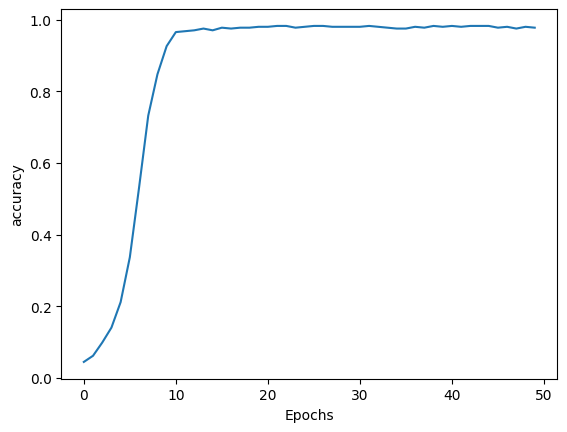

In [19]:
import matplotlib.pyplot as plt

def plot_graph(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

plot_graph(history, 'accuracy')


In [21]:
seed_text = "help me obi-wan kenobi you're my only hope"
next_words = 100

for i in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    probabilities = model.predict(token_list, verbose=0)
    choices = np.random.choice([1, 2, 3])
    predicted = np.argsort(probabilities[0])[-choices:]
    if predicted[-1] != 0:
        output_word = tokenizer.index_word[predicted[-1]]
        seed_text += " " + output_word

print(seed_text)


help me obi-wan kenobi you're my only hope help you learn because they have a penalty added cost loss of time regret regret service responds towards template questions questions towards template questions questions be performing area certain of action is less likely to succeed than the a user sends added from those actions can be be y others others y can be be added cost loss of time regret service responds towards template questions questions towards of an is questions towards template others y can be can be template questions y can be be service be be environment by performing certain certain is less likely to succeed than


In [22]:
import nltk
import random
import string
import warnings

warnings.filterwarnings('ignore')
nltk.download('punkt')
nltk.download('wordnet')

file = open('Mod10_2.txt', 'r', errors='ignore')
raw = file.read()
raw = raw.lower()

sent_tokens = nltk.sent_tokenize(raw)  # converts to list of sentences
word_tokens = nltk.word_tokenize(raw)  # converts to list of words

print(sent_tokens)
print(word_tokens)

# Preprocessing
lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

# Greetings
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up", "hey")
GREETING_RESPONSES = ["hi", "hey", "nods", "hi there", "hello", "I am glad! you are talking to me"]

def greeting(sentence):
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

# Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def response(user_response):
    chatbot_response = ''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words="english")
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx = vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if req_tfidf == 0:
        chatbot_response = chatbot_response + "I am sorry! I don't understand you"
        return chatbot_response
    else:
        chatbot_response = chatbot_response + sent_tokens[idx]
        return chatbot_response

# Main
flag = True
print("Hello there, my name is Aneka. I will answer your queries. If you want to exit, type 'Bye'")

while flag:
    user_response = input()
    user_response = user_response.lower()

    if user_response != 'bye':
        if user_response == 'thanks' or user_response == 'thank you':
            flag = False
            print("Aneka: You're welcome!")
        else:
            if greeting(user_response) is not None:
                print("Aneka: " + greeting(user_response))
            else:
                print("Aneka: ", end='')
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag = False
        print("Aneka: Bye! Have a great time!")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LEGION\AppData\Roaming\nltk_data...


['machine learning (ml) is a category of an algorithm that allows software applications to become \nmore accurate in predicting outcomes without being explicitly programmed.', 'supervised learning is a technique in which we teach or train the machine using data which is \nwell labeled.', 'this approach is similar to human learning under the supervision of a teacher.', 'the teacher provides good examples for the student to memorize, and the student then derives \ngeneral rules from these specific examples.', 'regression problems: the target is a numeric value.', 'example: determines the average prices of houses in the certain area\n\nclassification problems: the target is a qualitative variable, such as a class or a tag.', 'example: distinguishes between kinds of iris flowers based on their sepal and petal measures.', 'unsupervised learning involves training by using unlabeled data \nand allowing the model to act on that information without guidance.', 'some recommendation systems that 

ModuleNotFoundError: No module named 'sklearn'